In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
df = pd.read_csv('finantier_ds_technical_test_dataset.csv')

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [47]:
#Dropping the blank row and reset index
df.drop(0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
#Dropping customerID because it's irrelevant for analysis
df.drop('customerID',axis=1,inplace=True)

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
# Seach missing value
df.isna().sum()

gender              4
SeniorCitizen       4
Partner             4
Dependents          4
tenure              4
PhoneService        4
MultipleLines       4
InternetService     4
OnlineSecurity      4
OnlineBackup        4
DeviceProtection    4
TechSupport         4
StreamingTV         4
StreamingMovies     4
Contract            4
PaperlessBilling    4
PaymentMethod       4
MonthlyCharges      4
TotalCharges        4
Default             4
dtype: int64

In [51]:
df.shape

(7047, 20)

In [52]:
# View any data that has null value
df[df.isna().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Drop null data
df.dropna(inplace=True)

In [54]:
dfDesc = []
for i in df.columns:
    dfDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [55]:
pd.DataFrame(data = dfDesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,gender,object,0,0.0,2,"[Male, Female]"
1,SeniorCitizen,float64,0,0.0,2,"[1.0, 0.0]"
2,Partner,object,0,0.0,2,"[No, Yes]"
3,Dependents,object,0,0.0,2,"[No, Yes]"
4,tenure,float64,0,0.0,73,"[8.0, 15.0]"
5,PhoneService,object,0,0.0,2,"[No, Yes]"
6,MultipleLines,object,0,0.0,3,"[Yes, No]"
7,InternetService,object,0,0.0,3,"[No, DSL]"
8,OnlineSecurity,object,0,0.0,3,"[No, No internet service]"
9,OnlineBackup,object,0,0.0,3,"[Yes, No internet service]"


In [56]:
# Convert TotalCharges type to numeric
#df['TotalCharges'] = pd.to_numeric(df.TotalCharges)

#There seems to be an error because there are missing data (" ")

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7046
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Default             7043 non-null object
dtypes: float64(4), object(16)
memory usage: 1.4+ MB


In [57]:
# Check data that has ' ' on total cahrges
df[df['TotalCharges']== ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
492,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
757,Male,0.0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
940,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1086,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1344,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3335,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3830,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4384,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5222,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6674,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


If we look closely, we can see that we cant change the dtype because there are missing value on total charges when the tenure is 0. It means they are new customer (less than 1 month) that has not been charged yet

In [58]:
# Replace the missing value ' ' with '0' since we're gonna change the dype to float anyway
df['TotalCharges'].replace([' '], '0',inplace=True)

In [59]:
# Convert TotalCharges type to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges)

In [60]:
df.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Default              object
dtype: object

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Checking outliers

In [62]:
# Create function to check outliers
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [63]:
# Check the number of outlier for tenure
outliers = []
cek_outlier(df['tenure'])
print(len(outliers))

0


In [64]:
# Check the number of outlier for MonthlyCharges
outliers = []
cek_outlier(df['MonthlyCharges'])
print(len(outliers))

0


In [65]:
# Check the number of outlier for TotalCharges
outliers = []
cek_outlier(df['TotalCharges'])
print(len(outliers))

0


There are no outliers in this data

## Quick Exploratory Data Analysis

### Churn distribution

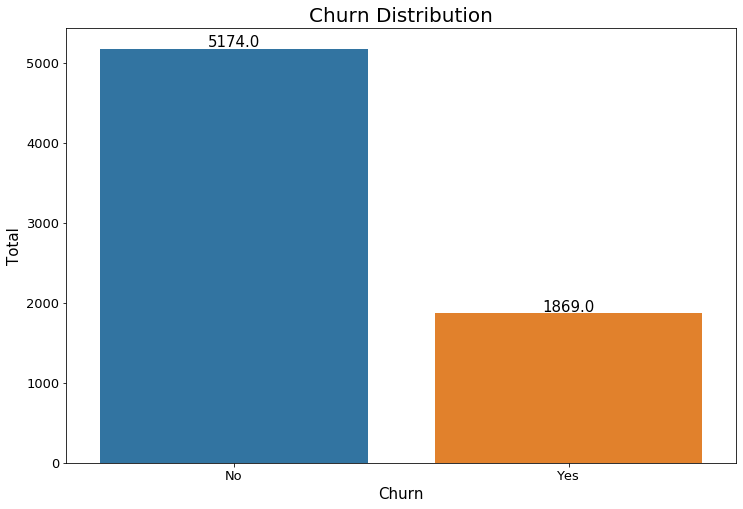

In [66]:
plt.figure(figsize=(12,8))
splot = sns.countplot(x='Default',data=df)

plt.title('Churn Distribution',size = 20)
plt.ylabel('Total',size=15)
plt.xlabel('Churn',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0,6), 
                   textcoords = 'offset points')
plt.show()

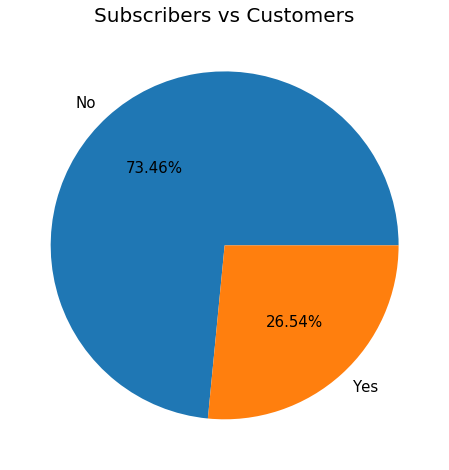

In [67]:
group_churn = df.groupby('Default',as_index=False)['gender'].count().rename(columns={'gender':'total'})

plt.figure(figsize=(10,8))
plt.pie(group_churn['total'],labels= group_churn['Default'], textprops={'fontsize': 15},autopct = '%1.2f%%')
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

From the data, about 1869 (26.54%) customer churn as we would expect where only the minority of people churn, this is a useful insight as we will need to do something about the imbalance data before modeling.

In [68]:
group_churn

,Default,total
0,No,5174
1,Yes,1869


### Demographic distribution

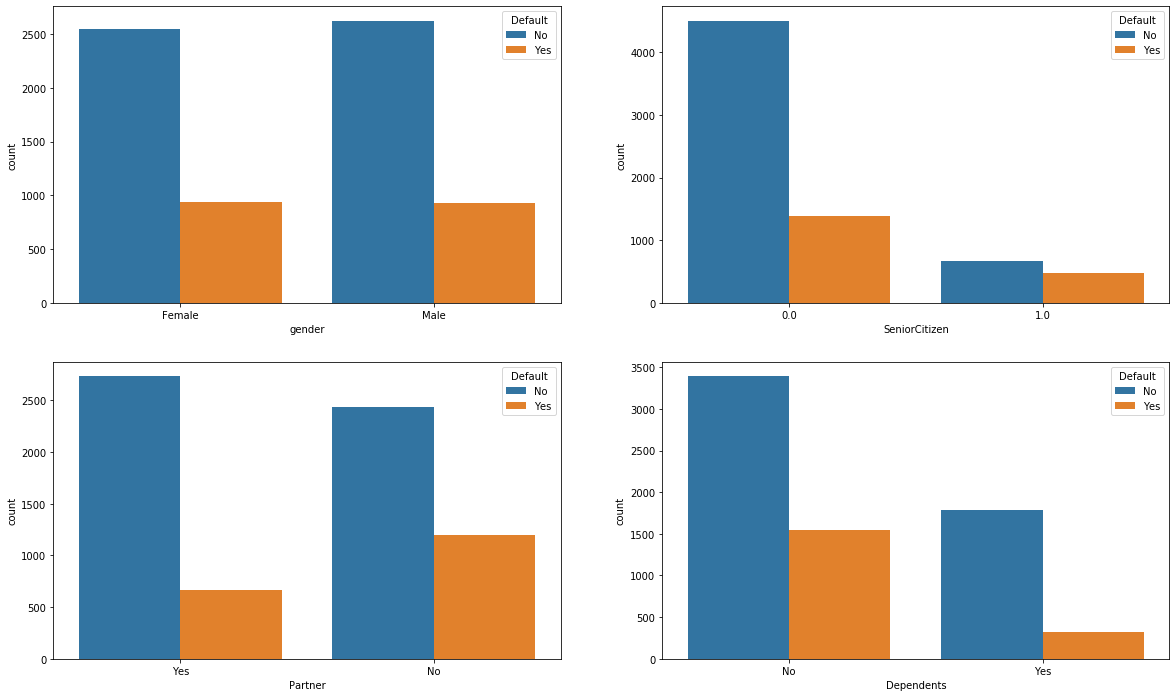

In [69]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='gender', hue = 'Default',data = df, ax=axarr[0][0])
sns.countplot(x='SeniorCitizen', hue = 'Default',data = df, ax=axarr[0][1])
sns.countplot(x='Partner', hue = 'Default',data = df, ax=axarr[1][0])
sns.countplot(x='Dependents', hue = 'Default',data = df, ax=axarr[1][1])
plt.show()

Based on the graph:
- We can see that gender is relatively the same and has almost no effect on churn
- Only minority of the customer is senior citizen, however they have more tendency to churn
- There are slightly more customer with partner, however those who do not have partner has relatively moret tendency to churn than those with partner
- Lastly, most of the customer does not have dependents, howerver they're also most likely to churn compare those who have dependents

### Other account information

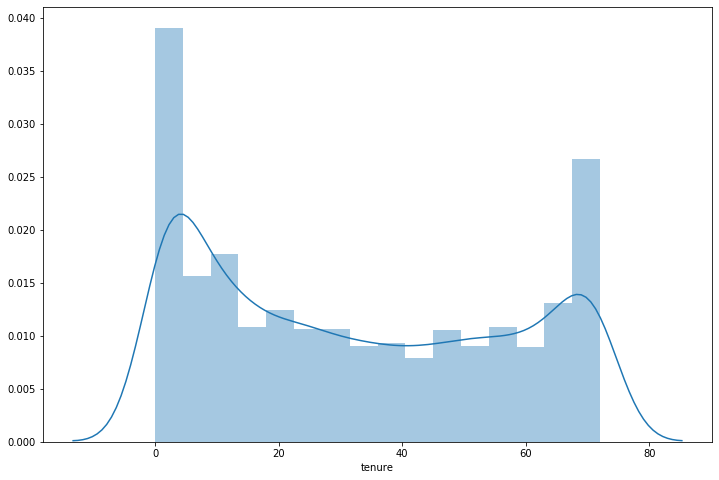

In [70]:
# Tenure distribution

plt.figure(figsize=(12,8))
sns.distplot(df['tenure'], hist=True)
plt.show()

Based on the histogram, many customers have been with the company for more or less a month, and there is also quite many customer stays for about 70 months.

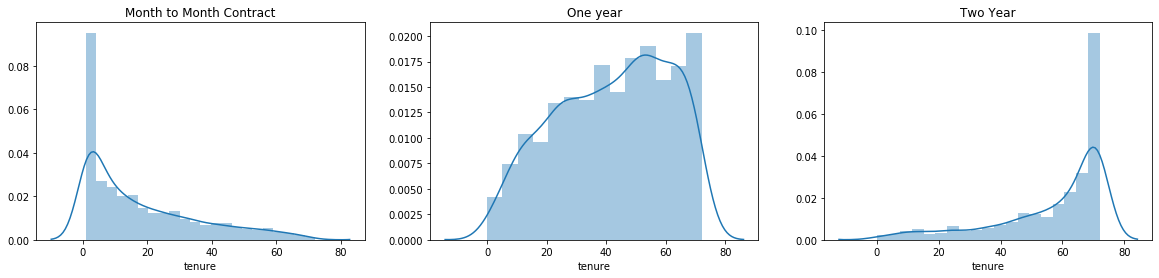

In [71]:
# Contracts

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,4))
ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'], hist=True,ax=ax1)
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'], hist=True,ax=ax2)
ax.set_title('One year')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'], hist=True,ax=ax3)
ax.set_title('Two Year')

plt.show()

Based on tenure and contracts histogram, we can see that there is possible correlation where customer with month to month contract tend to last about a month or more, while the one who has two year contract tend to be more loyal

### Correlation

(4.0, 0.0)

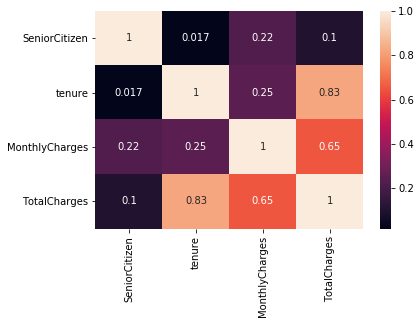

In [72]:
# Quick view on correlation
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- We can see that tenure and total charges has relatively high correlation
- Total charges and monthly charges also has medium correlation

* There might not be many insight we can conclude based on this correlation matrix, however this can be helpful for feature selection for modeling if necessary

## Data Preprocessing

In [73]:
# So that we still have the original data
df1 = df.copy()

In [74]:
# Label encoding for feature that have only 2 unique value

df1['gender'] = df['gender'].map({'Male' : 0, 'Female' : 1})
df1['Partner'] = df['Partner'].map({'No' : 0, 'Yes' : 1})
df1['Dependents'] = df['Dependents'].map({'No' : 0, 'Yes' : 1})
df1['PhoneService'] = df['PhoneService'].map({'No' : 0, 'Yes' : 1})
df1['PaperlessBilling'] = df['PaperlessBilling'].map({'No' : 0, 'Yes' : 1})
df1['Default'] = df['Default'].map({'No' : 0, 'Yes' : 1})

# We're not gonna use One Hot Encoder for all of the categorical data because there will be to many columns and slow the processing time

In [75]:
# One-Hot Encoding

df1 =  pd.get_dummies(data=df1, columns=['MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                                         'Contract','PaymentMethod'])

In [76]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Default,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0.0,1,0,1.0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0.0,0,0,34.0,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0.0,0,0,2.0,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0.0,0,0,45.0,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0.0,0,0,2.0,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### Splitting Data

In [77]:
X = df1.drop(columns='Default')
y = df1['Default']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .20, random_state = 42)

In [79]:
df1.shape

(7043, 41)

## Machine Learning

#### RANDOM FOREST - BASE MODEL

In [80]:
RF_Base = RandomForestClassifier()

In [81]:
RF_Base.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
y_pred_tr_RFBase = RF_Base.predict(X_train)

In [83]:
print(classification_report(y_train, y_pred_tr_RFBase))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [84]:
y_pred_ts_RFBase = RF_Base.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred_ts_RFBase))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [86]:
cm_RF_Base = confusion_matrix(y_test, y_pred_ts_RFBase , labels=[0, 1])

In [87]:
df_RF_Base = pd.DataFrame(cm_RF_Base, index=['Akt 0', 'Akt 1'], columns =  ['Pred 0', 'Pred 1'])
df_RF_Base

,Pred 0,Pred 1
Akt 0,919,116
Akt 1,189,185


#### LOGISTIC REGRESSION - BASE MODEL

In [88]:
LR_Base = LogisticRegression()

In [89]:
LR_Base.fit(X_train, y_train)

D:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred_tr_LRBase = LR_Base.predict(X_train)

In [91]:
print(classification_report(y_train, y_pred_tr_LRBase))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.56      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [92]:
y_pred_ts_LRBase = LR_Base.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred_ts_LRBase))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [94]:
cm_LR_Base = confusion_matrix(y_test, y_pred_ts_LRBase , labels=[0, 1])

In [95]:
df_LR_Base = pd.DataFrame(cm_LR_Base, index=['Akt 0', 'Akt 1'], columns =  ['Pred 0', 'Pred 1'])
df_LR_Base

,Pred 0,Pred 1
Akt 0,927,108
Akt 1,163,211


#### KNN CLASSIFIER - BASE MODEL

In [96]:
KNNB = KNeighborsClassifier()

In [97]:
KNNB.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [98]:
y_pred_tr_KNNB = KNNB.predict(X_train)

In [99]:
print(classification_report(y_train, y_pred_tr_KNNB))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4139
           1       0.72      0.57      0.64      1495

    accuracy                           0.83      5634
   macro avg       0.79      0.74      0.76      5634
weighted avg       0.82      0.83      0.82      5634



In [100]:
y_pred_ts_KNNB = KNNB.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred_ts_KNNB))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1035
           1       0.58      0.43      0.49       374

    accuracy                           0.77      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409



In [102]:
cm_KNNB = confusion_matrix(y_test, y_pred_ts_KNNB, labels=[0, 1])

In [103]:
df_cmKNNB = pd.DataFrame(cm_KNNB, index=['Akt 0', 'Akt 1'], columns =  ['Pred 0', 'Pred 1'])
df_cmKNNB

,Pred 0,Pred 1
Akt 0,917,118
Akt 1,213,161


- Based on the three base model, Logistic Regression model test score is slightly better than Random Forest-
- Random forest and KNN model can also be considered as overfit whereas the logistic regression model is almost identical
- We will only use Logistic Regression model in this case for next step and so on because of time and processing power limitation

### Resampling data using Random Over Sampling

In this case because of imbalance data, we use Over Sampling to resample our data

This means the minority data will duplicate so that it match the amount of majority data

In [104]:
df_train = pd.concat([X_train, y_train], axis=1)

In [105]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Default
3742,0,0.0,0,0,35.0,0,0,49.20,1701.65,0,...,0,1,1,0,0,0,0,1,0,0
3155,0,0.0,1,1,15.0,1,0,75.10,1151.55,1,...,0,0,1,0,0,0,0,0,1,0
4864,0,0.0,1,1,13.0,0,0,40.55,590.35,0,...,0,0,0,0,1,0,0,0,1,0
3871,1,0.0,1,0,26.0,1,1,73.50,1905.70,1,...,0,1,0,0,1,0,1,0,0,0
3814,0,0.0,1,1,1.0,1,0,44.55,44.55,1,...,0,0,1,0,0,0,0,1,0,0


In [106]:
df_train['Default'].value_counts()

0    4139
1    1495
Name: Default, dtype: int64

In [107]:
not_churn = df_train[df_train['Default'] == 0] ## Majority (Not Churn)

In [108]:
churn = df_train[df_train['Default'] == 1] ## Minority (Churn)

In [109]:
churn_oversample = resample(churn, ## Minority
                           replace=True,
                           n_samples=len(not_churn), ## Majority
                           random_state = 42)

In [110]:
df_OverSample = pd.concat([not_churn, churn_oversample])

In [111]:
df_OverSample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Default
3742,0,0.0,0,0,35.0,0,0,49.20,1701.65,0,...,0,1,1,0,0,0,0,1,0,0
3155,0,0.0,1,1,15.0,1,0,75.10,1151.55,1,...,0,0,1,0,0,0,0,0,1,0
4864,0,0.0,1,1,13.0,0,0,40.55,590.35,0,...,0,0,0,0,1,0,0,0,1,0
3871,1,0.0,1,0,26.0,1,1,73.50,1905.70,1,...,0,1,0,0,1,0,1,0,0,0
3814,0,0.0,1,1,1.0,1,0,44.55,44.55,1,...,0,0,1,0,0,0,0,1,0,0


In [112]:
df_OverSample['Default'].value_counts()

1    4139
0    4139
Name: Default, dtype: int64

In [113]:
X_train_OS = df_OverSample.drop(columns='Default')
y_train_OS = df_OverSample['Default']

In [114]:
LR_OS = LogisticRegression()

In [115]:
LR_OS.fit(X_train_OS, y_train_OS)

D:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_predOS = LR_OS.predict(X_test)

In [117]:
print(classification_report(y_test, y_predOS))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [118]:
cm_OS = confusion_matrix(y_test, y_predOS, labels=[1, 0])

In [119]:
df_OS = pd.DataFrame(cm_OS, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_OS

,Pred 1,Pred 0
Akt 1,294,80
Akt 0,289,746


It seems the overall score is slightly worse than the base one, because of that we wont be using the oversampling model

### Power Transform

Because in EDA we see that most distribution for continuous data is not normally distributed, we will use power transformation

In [120]:
yeo_pow = PowerTransformer(method='yeo-johnson')

In [121]:
num_col = df1[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [122]:
num_Pow = yeo_pow.fit_transform(num_col)

In [123]:
df_Pow = pd.DataFrame(num_Pow)

In [124]:
df_Pow.shape

(7043, 3)

In [125]:
df_Pow.head()

,0,1,2
0,-1.644343,-1.158541,-1.792996
1,0.297205,-0.239492,0.254809
2,-1.495444,-0.342665,-1.375173
3,0.646327,-0.731079,0.233807
4,-1.495444,0.213545,-1.239490


In [126]:
df_dropped=df1.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

In [127]:
df_dropped.reset_index(drop=True, inplace=True)

In [128]:
df_1 = pd.concat([df_dropped, df_Pow], axis=1)

In [129]:
df_1.shape

(7043, 41)

### Data Splitting for PowerTransform

In [130]:
X_1 = df_1.drop(columns='Default')
y_1 = df_1['Default']

In [131]:
X_1.shape

(7043, 40)

In [132]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, stratify = y, test_size = .20, random_state = 42)

#### LOGISTIC REGRESSION - PowerTransform MODEL

In [133]:
LR_Pow = LogisticRegression()

In [134]:
LR_Pow.fit(X_train_1, y_train_1)

D:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred_tr_LRPow = LR_Pow.predict(X_train_1)

In [136]:
print(classification_report(y_train_1, y_pred_tr_LRPow))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4139
           1       0.68      0.54      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [137]:
y_pred_ts_LRPow = LR_Pow.predict(X_test_1)

In [138]:
print(classification_report(y_test_1, y_pred_ts_LRPow))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [139]:
cm_LR_Pow = confusion_matrix(y_test_1, y_pred_ts_LRPow , labels=[0, 1])

In [140]:
df_LR_Pow = pd.DataFrame(cm_LR_Pow, index=['Akt 0', 'Akt 1'], columns =  ['Pred 0', 'Pred 1'])
df_LR_Pow

,Pred 0,Pred 1
Akt 0,939,96
Akt 1,178,196


There is not much of a different from the base model, in fact the f1 score to predict Default is slightly worse in test score

### Hyperparameter Tuning

In [141]:
LR_Tuned = LogisticRegression()

In [142]:
skf = StratifiedKFold(n_splits=3)

In [143]:
param_LR = {
    'C': np.logspace(-3, 3, 7),
    'penalty' : ['l1', 'l2', 'elasticnet']
    }

In [144]:
GS_LR = GridSearchCV(LR_Tuned, param_LR,scoring='f1', cv = skf, n_jobs=-1, verbose=1)

In [145]:
GS_LR.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  56 out of  63 | elapsed:    4.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    4.2s finished
D:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [146]:
# Check the best parameters
GS_LR.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [147]:
LR_Tune = GS_LR.best_estimator_

In [148]:
LR_Tune.fit(X_train, y_train)

D:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
y_pred_tr_LRTune = LR_Tune.predict(X_train)

In [150]:
print(classification_report(y_train, y_pred_tr_LRTune))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.55      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [151]:
y_pred_ts_LRTune= LR_Tune.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred_ts_LRTune))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [153]:
cm_LR_Tune = confusion_matrix(y_test, y_pred_ts_LRTune , labels=[0, 1])

In [154]:
df_LR_Tune = pd.DataFrame(cm_LR_Tune, index=['Akt 0', 'Akt 1'], columns =  ['Pred 0', 'Pred 1'])
df_LR_Tune

,Pred 0,Pred 1
Akt 0,927,108
Akt 1,164,210


Even though we use hyperparameter the result still similar from the base model

Thus, for deployment of our model we decide to use the base model

### Export model

In [159]:
## Splitting data
x = df.drop(columns='Default')
y = df['Default']

In [160]:
x_train, x_test, y_train,y_test = train_test_split(x,y,stratify=y, test_size= .20, random_state=420)

In [161]:
x_train.shape

(5634, 19)

In [21]:
x_test.shape

(2026, 19)

In [162]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Default'],
      dtype='object')

In [166]:
num_columns = ['tenure','MonthlyCharges', 'TotalCharges']

cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categorical', categoric_pipeline, cat_columns)
])

pipe_LR = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

In [167]:
pipe_LR.fit(x_train, y_train)

D:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                   

In [168]:
y_pred_LR_tr = pipe_LR.predict(x_train)

In [169]:
print(classification_report(y_train, y_pred_LR_tr))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      4139
         Yes       0.67      0.53      0.59      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634



In [170]:
y_pred_LR_ts = pipe_LR.predict(x_test)

In [171]:
print(classification_report(y_test, y_pred_LR_ts))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1035
         Yes       0.66      0.59      0.62       374

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [183]:
dat = [['Male',0,'Yes','Yes',10,'Yes','Yes','DSL','No','Yes','Yes','Yes','Yes','Yes','Two year','Yes','Electronic check',80,10000]]

In [184]:
tes = pd.DataFrame(dat,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'])

In [185]:
tes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,10,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,80,10000


In [188]:
a = pipe_LR.predict(tes)

In [196]:
a

array(['Yes'], dtype=object)

In [197]:
type(a)

numpy.ndarray

In [193]:
ts= a.tostring()

In [199]:
ts

b'\x98\xd2\xa6\xc67\x01\x00\x00'

In [178]:
pipe_LR.predict([['Male',0,'Yes','Yes',10,'Yes','Yes','DSL','No','Yes','Yes','Yes','Yes','Yes','Two year','Yes','Electronic check',80,10000]])

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [173]:
# Create pickle file

import pickle
pickle_out= open('model_telco.pkl','wb')
pickle.dump(pipe_LR,pickle_out)
pickle_out.close()